In [5]:
import numpy as np
import pandas as pd
import sklearn

In [6]:
from sklearn.datasets import load_boston
df = load_boston()

In [10]:
df.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [11]:
print(df.data)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [ ]:
boston = pd.DataFrame(df.data, columns=df.feature_names)
boston.head()

In [ ]:
boston['MEDV'] = df.target
boston.head()

In [ ]:
boston.isnull()

In [ ]:
boston.isnull().sum()

In [ ]:
from sklearn.model_selection import train_test_split
X = boston.drop('MEDV', axis=1)
Y = boston['MEDV']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [27]:
lin_model = LinearRegression()

lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))

print("The model performance for training set")
print('RMSE is {}',format(rmse))
print("\n")

y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

print("The model performance for testing set")
print('RMSE is {}',format(rmse))



The model performance for training set
RMSE is {} 4.710901797319796


The model performance for testing set
RMSE is {} 4.687543527902972


Text(0, 0.5, 'Predicted')

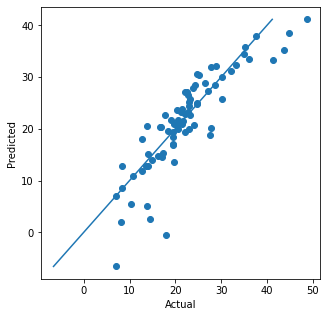

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.scatter(Y_test, y_test_predict)
plt.plot([min(y_test_predict),max(y_test_predict)],[min(y_test_predict),max(y_test_predict)])
plt.xlabel('Actual')
plt.ylabel('Predicted')